# Bomba

In [3]:
from LaviRot import *
import numpy as np
np.set_printoptions(precision=1, linewidth=300)
%matplotlib inline
from scipy.integrate import odeint
import scipy as sp


We will consider a pump with shaft made from ASTM A434 and impellers made from ASTM A487, which has the following properties.

In [4]:
E = 211e9
Gs = 81.2e9
rho = 7810

Ei = 199e9
rhoi = 7690

Shaft's inner and outer diameter will be:

In [5]:
si_d = 0
so_d = 0.08255

Now we define the length for each element, starting at the first element on the left (the element that will have the thrust collar).

In [6]:
L = [0.08979, 
    0.08979,
    0.08979, 
    0.08979, 
    0.08979,
    0.08979, #Mancal 1
    0.0653,
    0.0653, 
    0.0653,
    0.0653,
    0.1026, #Selo mecânico
    0.03848, 
    0.102, #luva de eixo 1
    0.07253,
    0.03452,#Impelidor 4 estagio
    0.05665,
    0.05665,
    0.03452, #Impelidor 5 estagio
    0.06512,
    0.06512,
    0.03452, #Impelidor 6 estagio
    0.06417,
    0.077, #Luva de eixo 2
    0.04688,
    0.03452, #Impelidor 3 estagio
    0.0643,
    0.0643,
    0.03452, #Impelidor estagio 2
    0.05527,
    0.0385,#Luva de eixo 3
    0.06712,
    0.06712, 
    0.04488, #Impelidor estagio 1
    0.06094,
    0.06094,
    0.06094,
    0.1026, #Selo mecânico 2
    0.08338,
    0.08979, #Mancal 2
    0.05131,
    0.05131,
    0.05131,
    0.05131,
    0.05131,
    0.05131,
    0.05131,
    0.05131]

The next line defines a list with the number of each element (from 0 to len(L)).

In [7]:
nelem = [x for x in range(len(L))]

In [8]:
shaft_elem = [ShaftElement(n, l, si_d, so_d, E, Gs, rho,
                           shear_effects=True,
                           rotary_inertia=True,
                           gyroscopic=True) for n, l in zip(nelem, L)]

In [9]:
shaft_elem1 = shaft_elem[0]

In [10]:
luva1 = DiskElement(12, rho, 0.102, so_d, 0.10815)
Imp4 = DiskElement(14, rhoi, 0.03452, so_d, 0.35505)
Imp5 = DiskElement(17, rhoi, 0.03452, so_d, 0.35505)
Imp6 = DiskElement(20, rhoi, 0.03452, so_d, 0.35505)
luva2 = DiskElement(22, rho, 0.077, so_d, 0.10815)
Imp3 = DiskElement(24, rhoi, 0.03452, so_d, 0.35505)
Imp2 = DiskElement(27, rhoi, 0.0385, so_d, 0.35505)
luva3 = DiskElement(29, rhoi, 0.03452, so_d, 0.10815)
Imp1 = DiskElement(32, rho, 0.03452, so_d, 0.35505)
Acop = DiskElement(46, rho, 0.03452, so_d, 0.376)

In [11]:
kx = 1.7513e7
kyx = -2.917e6
cx = 1.752e3
bearing0 = BearingElement(4, kxx=kx, kyy=kx, cxx=cx, cyy=cx, cxy=cx, cyx=-cx, kyx=-kyx, kxy=kyx) #Mancal Hidrodinâmico
bearing1 = BearingElement(38, kxx=kx, kyy=kx, cxx=cx, cyy=cx, cxy=cx, cyx=-cx, kyx=-kyx, kxy=kyx) #Mancal Hidrodinâmico

In [12]:
Bomba =      Rotor(shaft_elem,
                   [luva1, Imp4, Imp5, Imp6, luva2, Imp3, Imp2, luva3, Imp1, Acop],
                   [bearing0, bearing1])

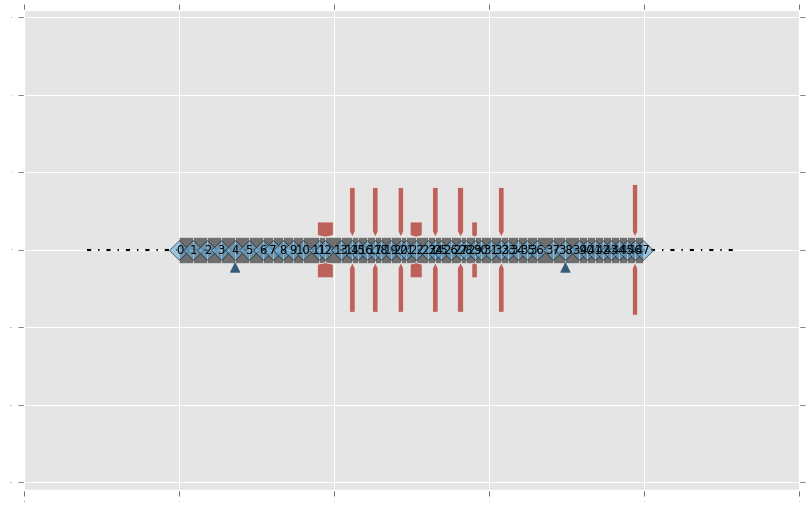

In [13]:
plot_rotor(Bomba)

Now we are going to check the natural frequencies using the Campbell diagram.
First we need to define the speed range that we want to analyze.

In [14]:
speed = np.linspace(0, 200, 10)

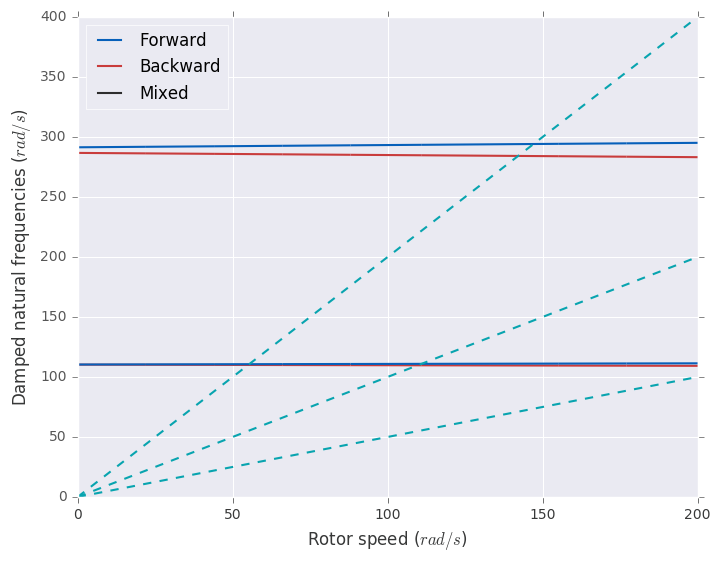

In [17]:
campbell(Bomba, speed, mult=[0.5, 1, 2])